In [1]:
#Data Source URL: https://www.kaggle.com/albabshams/suicides-in-india-analysed/data

import os
PATH = '../input'
os.listdir(PATH)

['suicides-in-india-20072018']

Import statements

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output
df = pd.read_csv('../input/suicides-in-india-20072018/Suicides in India 2007-2018.csv')
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2007,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2007,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2007,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2007,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2007,Causes,Dowry Dispute,Female,0-14,0


In [3]:
df.shape # Find the size of dataframe

(237519, 7)

In [4]:
df.info() # Find the count and datatype of field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
df.describe() #Find statistics like count, mean, standard deviation, etc

,Year,Total
count,237519.000000,237519.000000
mean,2012.500448,55.034578
std,3.452240,792.749287
min,2007.000000,0.000000
25%,2010.000000,0.000000
50%,2013.000000,0.000000
75%,2016.000000,6.000000
max,2018.000000,63343.000000


In [6]:
#Segregate the data by Type_code : Eg. Education status of persons doing suicide
eduDf = df[df['Type_code']=='Education_Status']
df.shape, eduDf.shape

((237519, 7), (7296, 7))

In [7]:
#Segregate the data by Type_code
causesDf = df[df['Type_code']=='Causes']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

In [8]:
df.shape, eduDf.shape, causesDf.shape, profDf.shape, socialDf.shape

((237519, 7), (7296, 7), (109200, 7), (49263, 7), (4560, 7))

In [9]:
eduDf.head() # Similarly we can display for every Type_code

,State,Year,Type_code,Type,Gender,Age_group,Total
260,A & N Islands,2007,Education_Status,Diploma,Female,0-100+,0
261,A & N Islands,2007,Education_Status,No Education,Female,0-100+,4
262,A & N Islands,2007,Education_Status,Post Graduate and Above,Female,0-100+,0
263,A & N Islands,2007,Education_Status,Middle,Female,0-100+,33
264,A & N Islands,2007,Education_Status,Graduate,Female,0-100+,0


**1. Distribution of suicides according to Educational status and Gender**

In [10]:
eduDf = eduDf[['Type','Gender','Total']] #Extract Type, Gender and Total
eduDf.head()

,Type,Gender,Total
260,Diploma,Female,0
261,No Education,Female,4
262,Post Graduate and Above,Female,0
263,Middle,Female,33
264,Graduate,Female,0


In [11]:
#Group the data by 1. Type and 2. Gender, Calculate the sum of each group, sort the values by Total
edSort = eduDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False) 
#as_index=False -> Type and Gender will not be used as Index
edSort.head()

,Type,Gender,Total
15,Primary,Male,679473
9,Middle,Male,675624
11,No Education,Male,566445
7,Matriculate/Secondary,Male,523878
14,Primary,Female,409020


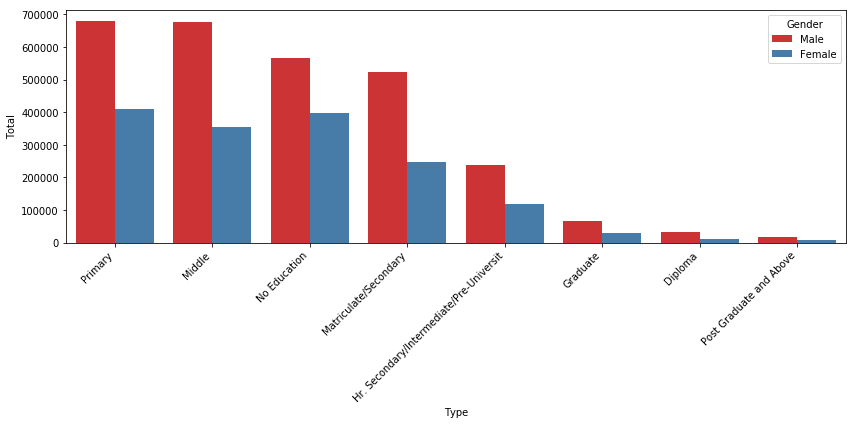

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=edSort,palette='Set1')
#hue = Legend, Palette= Color Scheme (Palette types: plasma, viridis, inferno, magma, Blues, Accent, Dark2, Paired etc)
#for palette list: https://bokeh.pydata.org/en/latest/docs/reference/palettes.html
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

Number of suicides appear to be concentrated towards Lower education level. Most of the people who have committed suicides have education level below Matriculate/Secondary.

**2. Distribution of number of suicides on the basis of social status**

In [13]:
socialDf = socialDf[['Type','Gender','Total']]
socialSort = socialDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
socialSort.head()

,Type,Gender,Total
3,Married,Male,1995021
2,Married,Female,1070301
5,Never Married,Male,608523
4,Never Married,Female,346380
9,Widowed/Widower,Male,96552


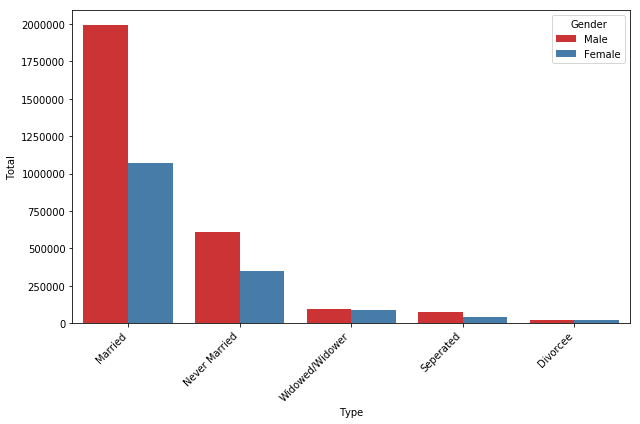

In [14]:
plt.figure(figsize=(9,6))
sns.barplot(x='Type',y='Total',data=socialSort,hue='Gender',palette='Set1')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

**3. Distribution of number of suicided on the basis of Cause**

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


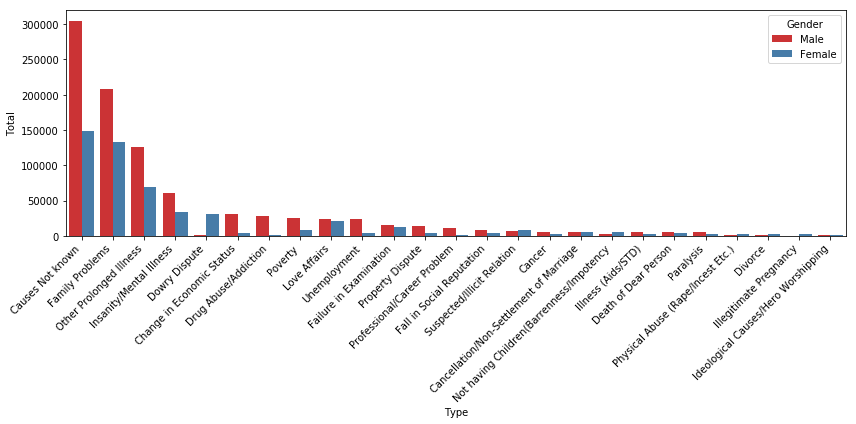

In [15]:
causesDf.is_copy = False
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic Status','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Other Causes (Please Specity)','Type'] = 'Causes Not known'
causesDf.loc[causesDf['Type']=='Not having Children (Barrenness/Impotency','Type'] = 'Not having Children(Barrenness/Impotency'
plt.figure(figsize=(12,6))
causesDf = causesDf[['Type','Gender','Total']]
causesSort = causesDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=causesSort,hue='Gender',palette='Set1')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

While most of the causes of the suicides are not known, the three major causes among the known cases are Family problems, Prolonged illness and mental illness.

According to the data men seem to be badly effected by unemployment, property dispute, poverty,drug abuse or addiction and change in economic status than women.

Number of women who have committed suicides due to dowry disputes is much higher when compared to men,

**4. Distribution of number of suicided on the basis of Professional Profile**

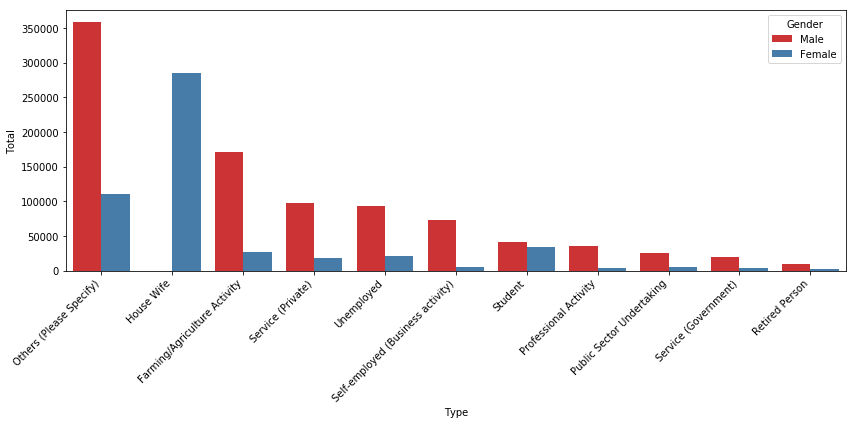

In [16]:
plt.figure(figsize=(12,6))
profDf = profDf[['Type','Gender','Total']]
profSort = profDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=profSort,hue='Gender',palette='Set1')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

According to the data, most of the females who have committed suicides are house wives. The percentage of female suicides in all other categories is much lower than the percentage of male suicides. While this is an indication of lower representation by women in professional careers, it also reiterates the importance of girl education and women empowerment. The graph shows that financially independent women are much mentally stronger.
It is disheartening to see that farmers who feed the rest of the country are the ones who are more committing suicides than any other profession. Followed by farmers, it's the unemployed and private sector employees who are most effected. It's surprising to know that the number of suicides among the unemployed and the private sector employees is almost the same. This also might be due to higher pressure in private sector when compared to government sector jobs.

**5. Distribution of number of suicides on the basis of State and Age group**

In [17]:
causes = df[df['Type_code']=='Causes']
causes.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2007,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2007,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2007,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2007,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2007,Causes,Dowry Dispute,Female,0-14,0


In [18]:
causesGrp = causes.groupby(['State','Age_group'],as_index=False).sum()
causesGrp.head()

,State,Age_group,Year,Total
0,A & N Islands,0-14,1255800,53
1,A & N Islands,15-29,1255800,630
2,A & N Islands,30-44,1255800,464
3,A & N Islands,45-59,1255800,311
4,A & N Islands,60+,1255800,165


In [19]:
causesGrpPvt = causesGrp.pivot(index='Age_group',columns='State',values='Total')
causesGrpPvt.head()

State,A & N Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,D & N Haveli,Daman & Diu,Delhi (Ut),...,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Age_group,,,,,,,,,,,,,,,,,,,,,
0-14,53,3265,49,734,572,16,2040,6,11,423,...,1898,76,149,1512,76,3205,312,1597,104,5038
15-29,630,55121,572,13384,3720,531,22048,303,131,8861,...,19665,2251,3675,19151,747,52468,3660,20480,1654,56688
30-44,464,56770,524,12747,3298,349,19954,183,88,5388,...,17961,2122,3172,18672,580,56599,3135,14524,1256,56391
45-59,311,34917,160,6601,1241,111,11907,121,42,1746,...,10405,1396,1585,9480,361,36792,1568,7105,552,33414
60+,165,12747,23,1003,414,27,4546,73,7,439,...,3519,584,689,2212,160,14749,519,2974,136,9499


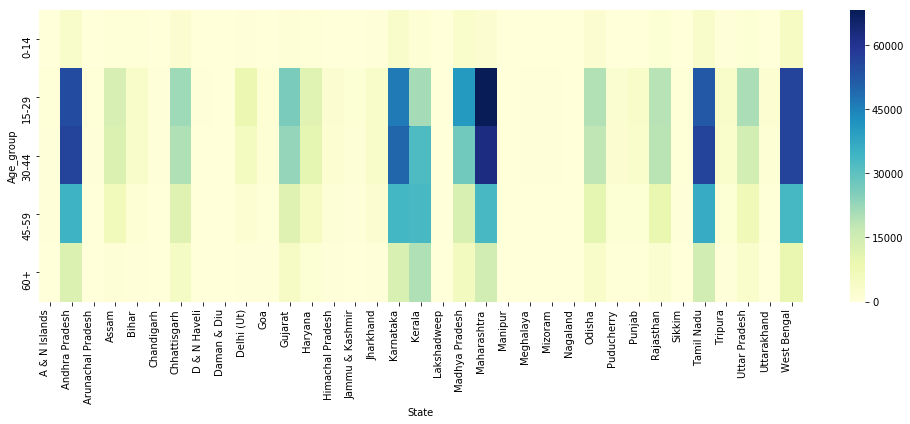

In [20]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causesGrpPvt,cmap='YlGnBu')
plt.tight_layout()

This plot gives us an insight on the number of suicides, based on state and age group. As we can see 15-29 is the most vulnerable age in all states except Kerala. Maharashtra is the state with most number of suicides.Number of suicides per square kilometre might give us some more information on this.

**6. Distribution of number of suicides on the basis of State and per square km**

In [21]:
edu = df[df['Type_code']=='Education_Status']
edu.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
260,A & N Islands,2007,Education_Status,Diploma,Female,0-100+,0
261,A & N Islands,2007,Education_Status,No Education,Female,0-100+,4
262,A & N Islands,2007,Education_Status,Post Graduate and Above,Female,0-100+,0
263,A & N Islands,2007,Education_Status,Middle,Female,0-100+,33
264,A & N Islands,2007,Education_Status,Graduate,Female,0-100+,0


In [22]:
st = edu.groupby(['State','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
st.head()

,State,Gender,Year,Total
63,Total (All India),Male,193200,931918
65,Total (States),Male,193200,914648
62,Total (All India),Female,193200,524013
64,Total (States),Female,193200,514365
41,Maharashtra,Male,193200,121754


In [23]:
#Removing the entries like "Total (Stetes)", "(All India)" from the output
st = st[(st['State']!='Total (States)') & (st['State']!='Total (All India)') & (st['State']!='Total (Uts)')]
st.head()

,State,Gender,Year,Total
41,Maharashtra,Male,193200,121754
3,Andhra Pradesh,Male,193200,108424
61,Tamil Nadu,Male,193200,102489
75,West Bengal,Male,193200,100411
33,Karnataka,Male,193200,98403


In [24]:
# values for areas are taken from wikipedia
statesArea = {'Maharashtra':307713,'West Bengal':88752,'Tamil Nadu':130058,'Andhra Pradesh':275045,'Karnataka':191791,'Kerala':38863,'Madhya Pradesh':308350,'Gujarat':196024,'Chhattisgarh':135191,'Odisha':155707,'Rajasthan':342239,'Uttar Pradesh':243290,'Assam':78438,'Haryana':44212,'Delhi (Ut)':1484,'Jharkhand':79714,'Punjab':50362,'Bihar':94163,'Tripura':10486,'Puducherry':562,'Himachal Pradesh':55673,'Uttarakhand':53483,'Goa':3702,'Jammu & Kashmir':222236,'Sikkim':7096,'A & N Islands':8249,'Arunachal Pradesh':83743,'Meghalaya':22429,'Chandigarh':114,'Mizoram':21081,'D & N Haveli':491,'Manipur':22327,'Nagaland':16579,'Daman & Diu':112,'Lakshadweep':32}
statesArea

{'Maharashtra': 307713,
 'West Bengal': 88752,
 'Tamil Nadu': 130058,
 'Andhra Pradesh': 275045,
 'Karnataka': 191791,
 'Kerala': 38863,
 'Madhya Pradesh': 308350,
 'Gujarat': 196024,
 'Chhattisgarh': 135191,
 'Odisha': 155707,
 'Rajasthan': 342239,
 'Uttar Pradesh': 243290,
 'Assam': 78438,
 'Haryana': 44212,
 'Delhi (Ut)': 1484,
 'Jharkhand': 79714,
 'Punjab': 50362,
 'Bihar': 94163,
 'Tripura': 10486,
 'Puducherry': 562,
 'Himachal Pradesh': 55673,
 'Uttarakhand': 53483,
 'Goa': 3702,
 'Jammu & Kashmir': 222236,
 'Sikkim': 7096,
 'A & N Islands': 8249,
 'Arunachal Pradesh': 83743,
 'Meghalaya': 22429,
 'Chandigarh': 114,
 'Mizoram': 21081,
 'D & N Haveli': 491,
 'Manipur': 22327,
 'Nagaland': 16579,
 'Daman & Diu': 112,
 'Lakshadweep': 32}

In [25]:
#To add the "Area" Column into the table/ dataset
for state in statesArea.keys():
    st.loc[st['State']==state,'Area'] = statesArea[state] 
st.head()

,State,Gender,Year,Total,Area
41,Maharashtra,Male,193200,121754,307713.0
3,Andhra Pradesh,Male,193200,108424,275045.0
61,Tamil Nadu,Male,193200,102489,130058.0
75,West Bengal,Male,193200,100411,88752.0
33,Karnataka,Male,193200,98403,191791.0


In [26]:
st['Suicides_per_squareKm'] = st['Total']/st['Area']
st.head()

,State,Gender,Year,Total,Area,Suicides_per_squareKm
41,Maharashtra,Male,193200,121754,307713.0,0.395674
3,Andhra Pradesh,Male,193200,108424,275045.0,0.394205
61,Tamil Nadu,Male,193200,102489,130058.0,0.788025
75,West Bengal,Male,193200,100411,88752.0,1.131366
33,Karnataka,Male,193200,98403,191791.0,0.513074


In [27]:
#Sorting values based of Suicides_per_squareKm in Descending order
sortedStates = st.sort_values('Suicides_per_squareKm',ascending=False)
sortedStates.head()

,State,Gender,Year,Total,Area,Suicides_per_squareKm
53,Puducherry,Male,193200,4228,562.0,7.523132
19,Delhi (Ut),Male,193200,10719,1484.0,7.223046
11,Chandigarh,Male,193200,656,114.0,5.754386
18,Delhi (Ut),Female,193200,6138,1484.0,4.136119
52,Puducherry,Female,193200,2201,562.0,3.916370


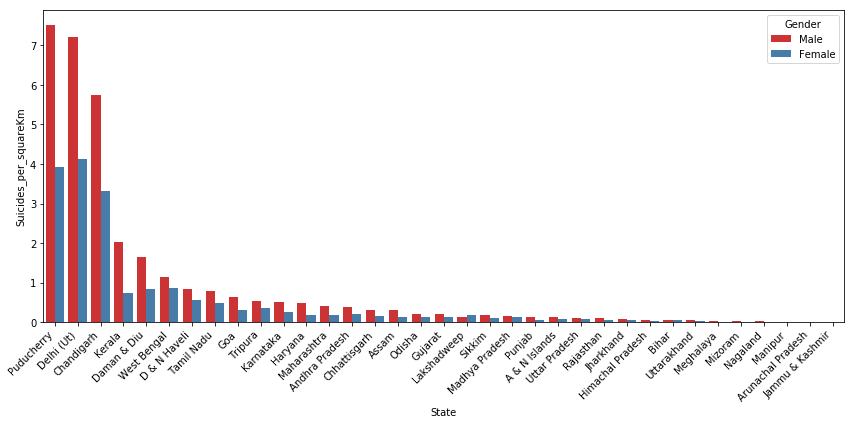

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x='State',y='Suicides_per_squareKm',data=sortedStates,hue='Gender',palette='Set1')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

Union territories whose area is much smaller compared other states have higher number of suicides per square kilometre. Again, Kerala is an exception here as it larger compared all other union territories. Kerala is followed by West Bengal and Tamil Nadu among the Indian states to register higher number of suicides.

**7. Distribution of number of suicides in India overall**

In [29]:
indiaOverall = df[(df['Type_code']=='Education_Status') & (df['State']=='Total (All India)')]
indiaOverall.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
209476,Total (All India),2007,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Female,0-100+,2391
209477,Total (All India),2007,Education_Status,Diploma,Female,0-100+,294
209478,Total (All India),2007,Education_Status,Matriculate/Secondary,Female,0-100+,5486
209479,Total (All India),2007,Education_Status,No Education,Female,0-100+,12817
209480,Total (All India),2007,Education_Status,Post Graduate and Above,Female,0-100+,192


In [30]:
overall = indiaOverall.groupby(['Year'],as_index=False).sum()
overall.head()

,Year,Total
0,2007,108506
1,2008,110417
2,2009,110851
3,2010,113697
4,2011,113914


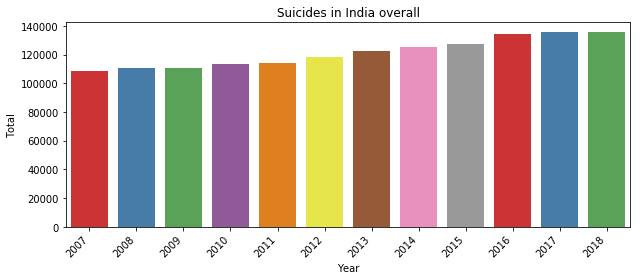

In [31]:
plt.figure(figsize=(9,4))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='Year',y='Total',data=overall,palette='Set1').set_title('Suicides in India overall')
plt.tight_layout()

In [32]:
#To calculate the percentage increase in suicides
Suicides_in_2018 = int(overall[overall['Year']==2018]['Total'])
Suicides_in_2007 = int(overall[overall['Year']==2007]['Total'])
(Suicides_in_2018 - Suicides_in_2007)*100/Suicides_in_2018

19.889253940713942

The total number of suicides in the conutry are increasing with time. 
From 2007 to 2018 the percentage increase in suicides is 20% which is very scary